In [1]:
!pip install fastai -q --upgrade

In [2]:
!pip install datasets -q --upgrade

#### Only for initial download

In [3]:
#from datasets import load_dataset

In [4]:
#dataset = load_dataset("rvl_cdip")

In [5]:
#dataset

In [6]:
#dataset.save_to_disk("./dataset/rvl_cdip")

#### Processing of the dataset

In [7]:
from fastai.vision.all import *

In [8]:
dataset_path = Path('./dataset/rvl_cdip/rvl_cdip-small/rvl-cdip-small/')

In [9]:
if not os.path.exists(dataset_path):
    print('Can not find dataset folder')

In [10]:
# Only run when executing the notebookt the first time
# failed = verify_images(get_image_files(dataset_path))
# failed.map(Path.unlink)
# len(failed)

In [11]:
documents = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = GrandparentSplitter(train_name = 'train', valid_name = 'val'),
    get_y = parent_label,
    item_tfms = Resize(size=480, method='Crop')
)

In [12]:
documents.summary(dataset_path)

Setting-up type transforms pipelines
Found 129978 items
2 datasets of sizes 124977,5001
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      dataset/rvl_cdip/rvl_cdip-small/rvl-cdip-small/train/invoice/2074104091.tif
    applying PILBase.create gives
      PILImage mode=RGB size=754x1000
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      dataset/rvl_cdip/rvl_cdip-small/rvl-cdip-small/train/invoice/2074104091.tif
    applying parent_label gives
      invoice
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(6)

Final sample: (PILImage mode=RGB size=754x1000, TensorCategory(6))


Found 129978 items
2 datasets of sizes 124977,5001
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': N

In [13]:
dls = documents.dataloaders(dataset_path, bs=32)

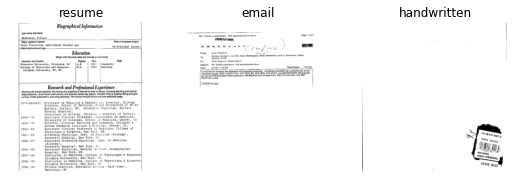

In [14]:
dls.show_batch(nrows=1, ncols=3)

In [15]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SuggestedLRs(valley=0.0012022644514217973)

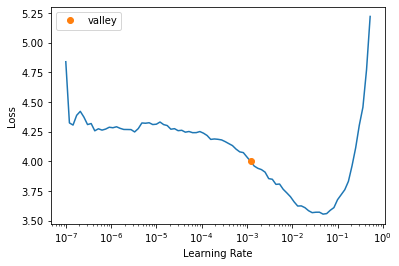

In [16]:
learn.lr_find()

In [17]:
learn.fit_one_cycle(3, 1e-3)

epoch,train_loss,valid_loss,error_rate,time


EOFError: 

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(6, lr_max=slice(1e-6, 1e-5))